In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/stroke-dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df['gender'].value_counts() 

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [5]:
df['hypertension'].value_counts() 

hypertension
0    4612
1     498
Name: count, dtype: int64

In [6]:
df['heart_disease'].value_counts() 

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [7]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [8]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [9]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [10]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [11]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


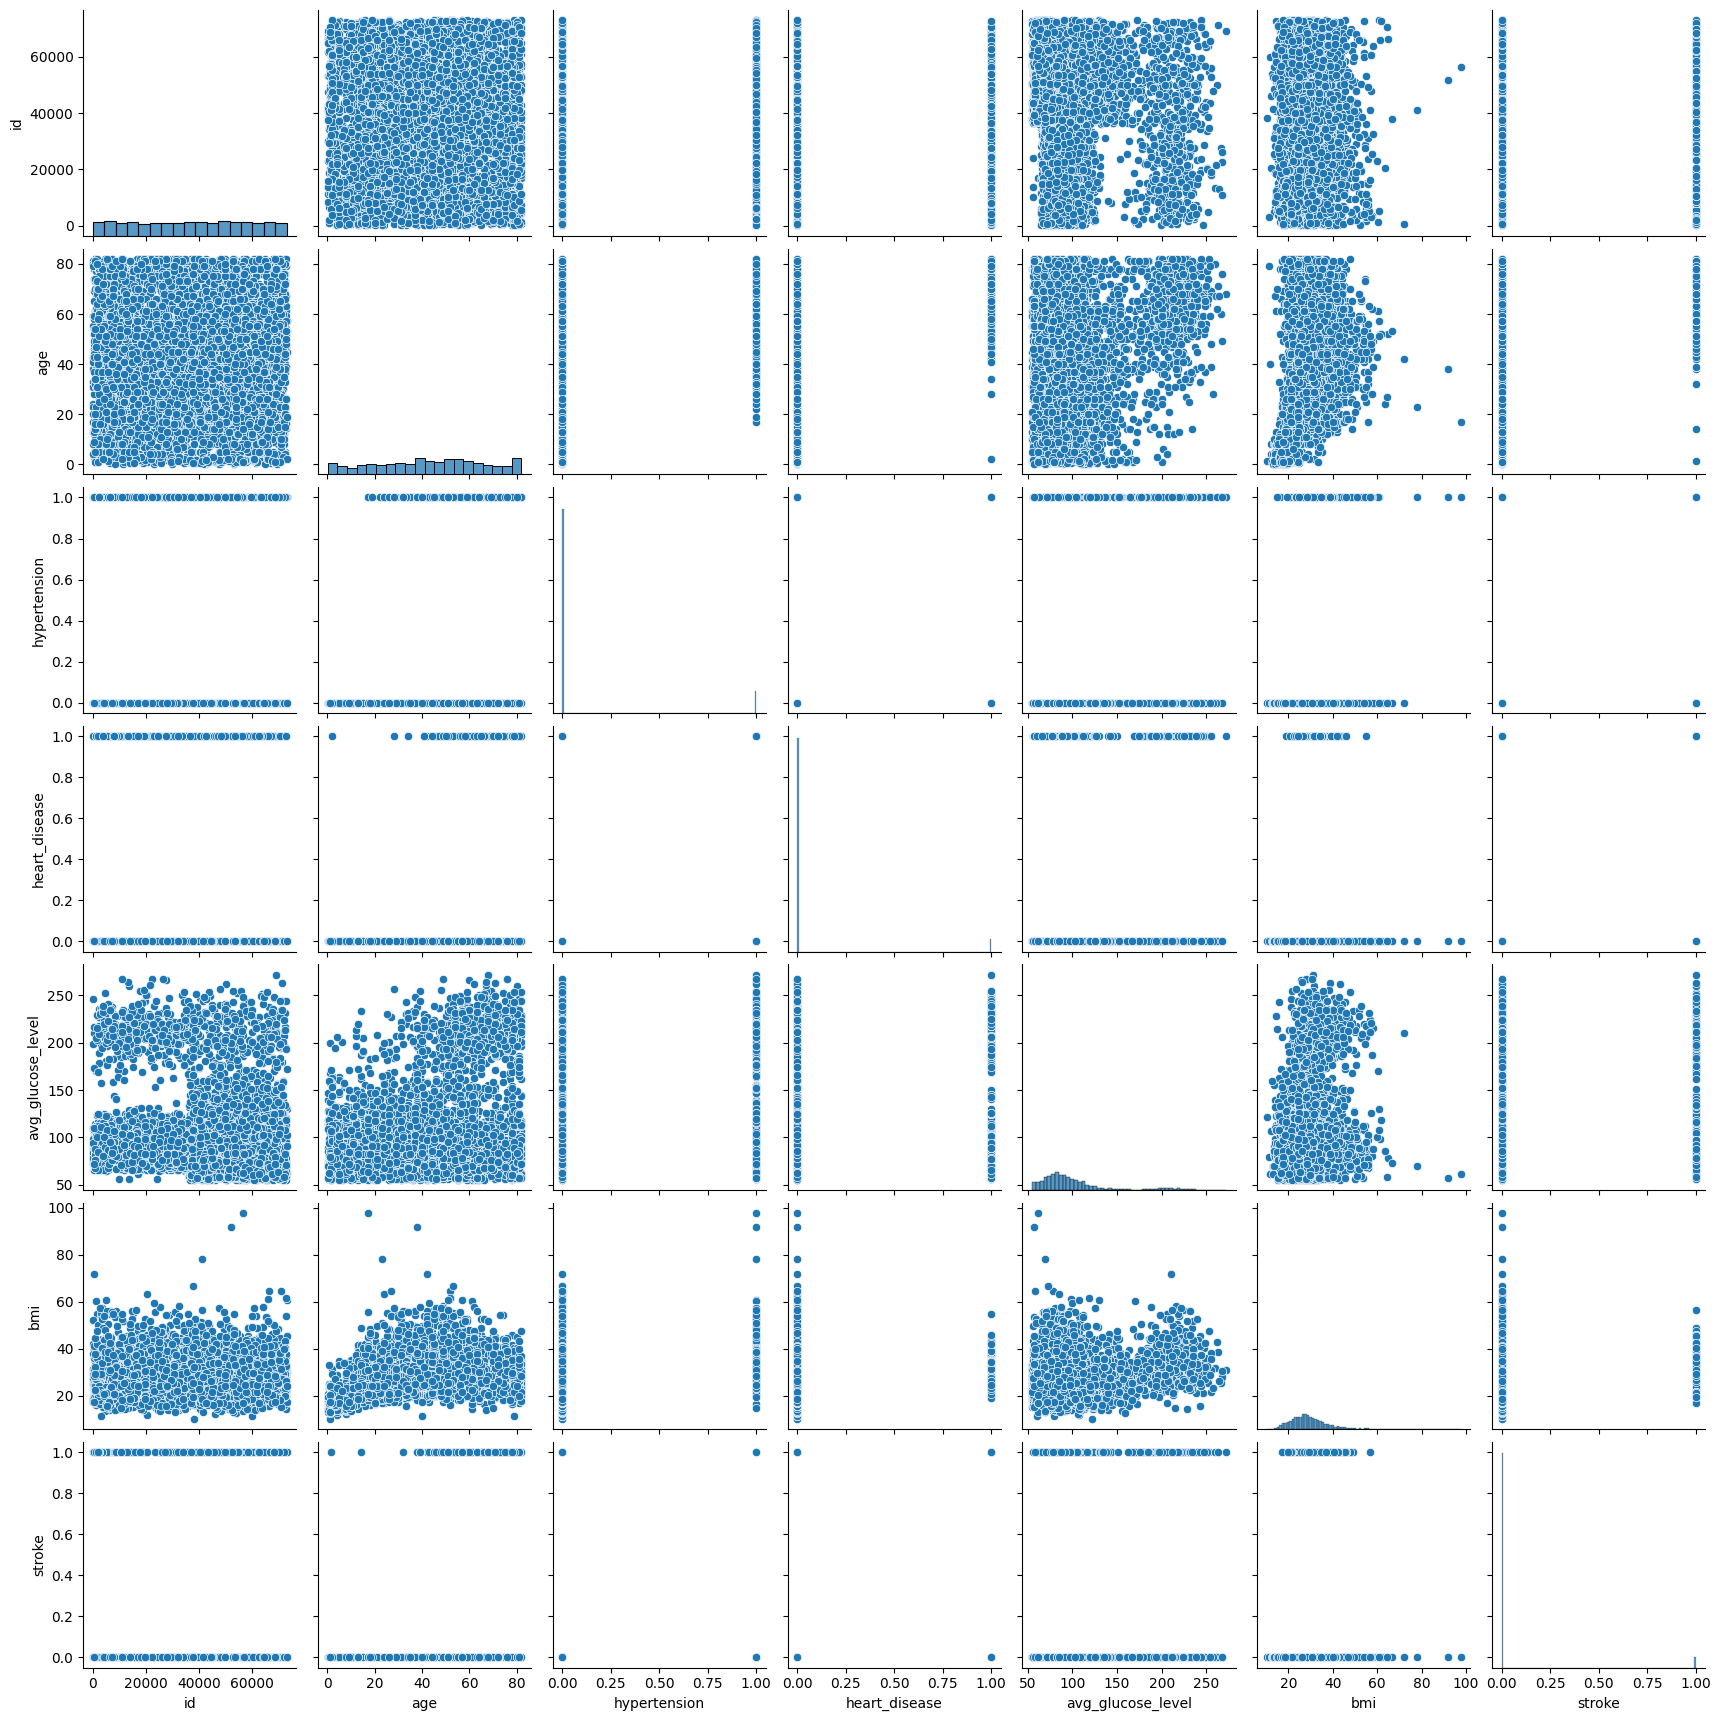

In [13]:
sns.pairplot(data = df,)

The pairplot shows no linear correlation between the features. The features are linear independent.


In [14]:
correlation_matrix = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].corr() # Compute the correlation matrix
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


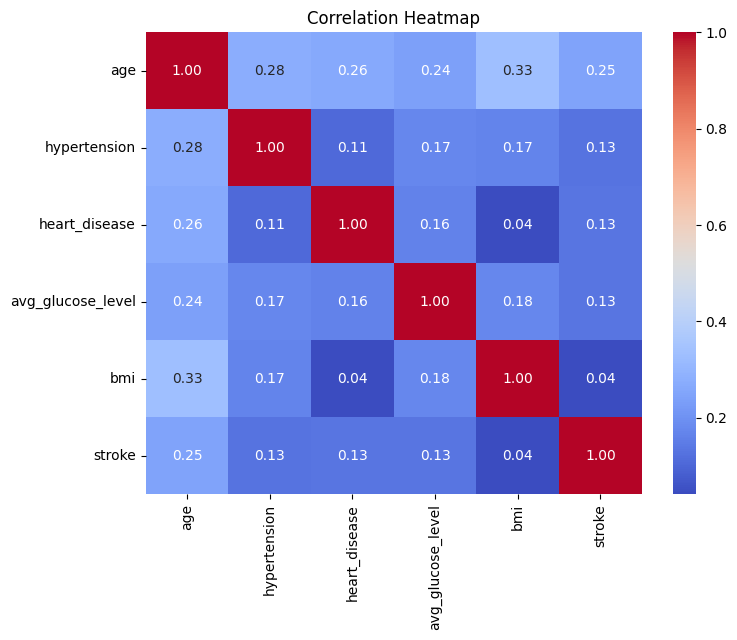

In [15]:
# Visualize the correlation matrix usign heat map.
# Plot the heatmap
plt.figure(figsize=(8, 6)) # Adjust plot size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') # Create the heatmap
plt.title('Correlation Heatmap') # Add a title
plt.show() # Display the plot

Target Distribution
- Goal: See the class imbalance clearly.
- Bar plot / Count plot:
- Shows how few stroke cases you have (250 vs 4000).

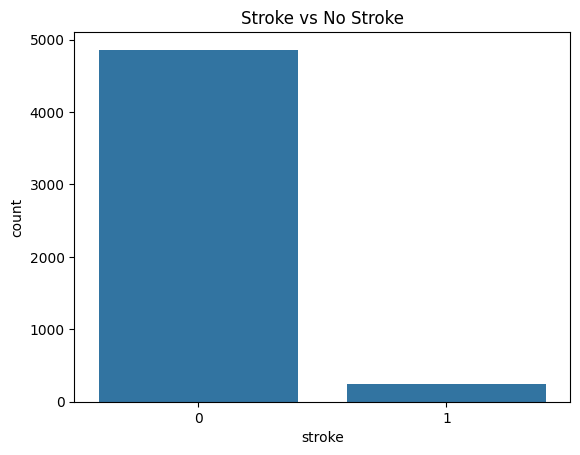

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df)
plt.title('Stroke vs No Stroke')
plt.show()

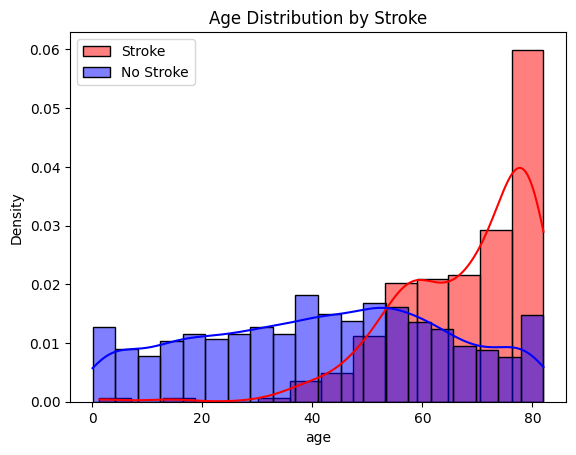

In [17]:
sns.histplot(df[df['stroke']==1]['age'], kde=True, color='red', label='Stroke', stat="density")
sns.histplot(df[df['stroke']==0]['age'], kde=True, color='blue', label='No Stroke', stat="density")
plt.legend()
plt.title('Age Distribution by Stroke')
plt.show()

Feature Distributions (Numerical Features)
- Goal: See spread, outliers, and differences between stroke and no-stroke.
- Histogram / KDE Plot:
- Helps spot patterns: e.g., strokes mostly occur in older people

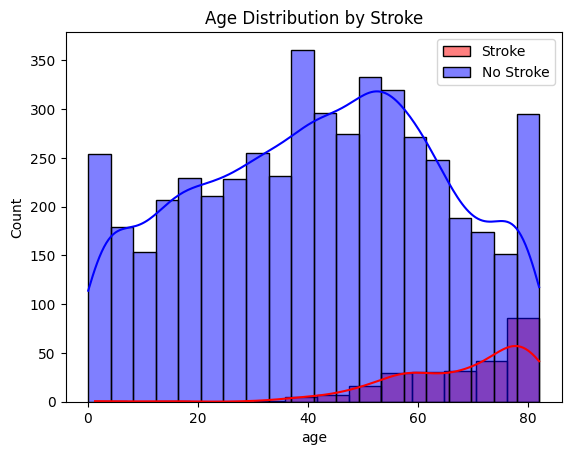

In [18]:
sns.histplot(df[df['stroke']==1]['age'], kde=True, color='red', label='Stroke')
sns.histplot(df[df['stroke']==0]['age'], kde=True, color='blue', label='No Stroke')
plt.legend()
plt.title('Age Distribution by Stroke')
plt.show()

Feature Distributions (Numerical Features)

- Goal: See spread, outliers, and differences between stroke and no-stroke.
- Histogram / KDE Plot:
- Helps spot patterns: e.g., strokes mostly occur bmi around 25 and 35

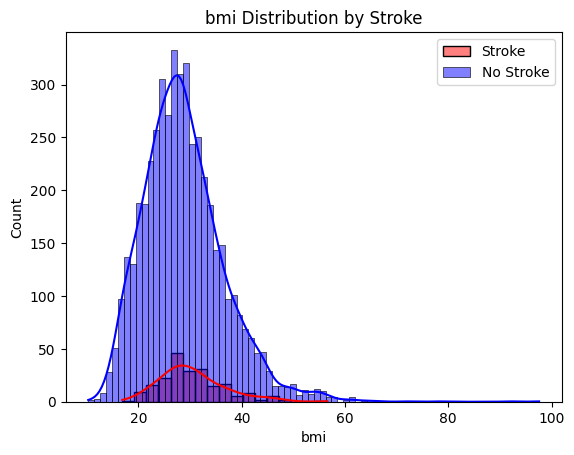

In [19]:
sns.histplot(df[df['stroke']==1]['bmi'], kde=True, color='red', label='Stroke')
sns.histplot(df[df['stroke']==0]['bmi'], kde=True, color='blue', label='No Stroke')
plt.legend()
plt.title('bmi Distribution by Stroke')
plt.show()

Feature Distributions (Numerical Features)
- Goal: See spread, outliers, and differences between stroke and no-stroke.
- Histogram / KDE Plot:
- Helps spot patterns: e.g., strokes mostly occur for avg_glucose_level values 

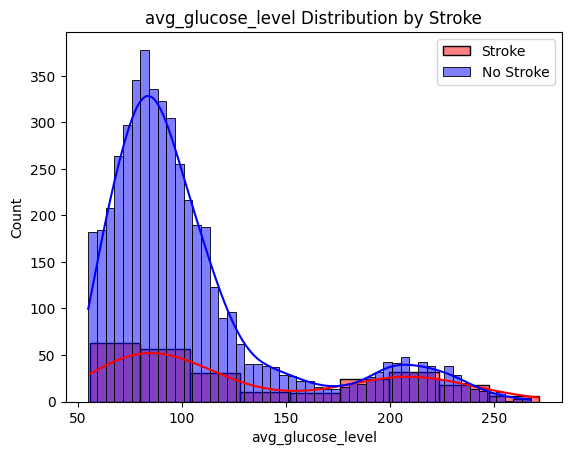

In [20]:
sns.histplot(df[df['stroke']==1]['avg_glucose_level'], kde=True, color='red', label='Stroke')
sns.histplot(df[df['stroke']==0]['avg_glucose_level'], kde=True, color='blue', label='No Stroke')
plt.legend()
plt.title('avg_glucose_level Distribution by Stroke')
plt.show()

Categorical Feature Comparison

- Goal: See how features like hypertension or heart_disease relate to stroke.
- Stacked bar plot / count plot with hue:
- Lets you see whether stroke is more common in people with hypertension

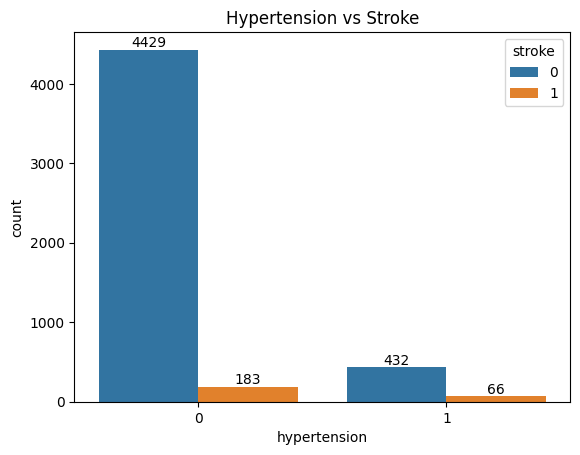

In [21]:
ax = sns.countplot(x='hypertension', hue='stroke', data=df)
# Add the count labels above the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hypertension vs Stroke')
plt.show()

Pairplots / Scatterplots
- Goal: Explore relationships between numerical variables.
- Useful to detect nonlinear separation patterns

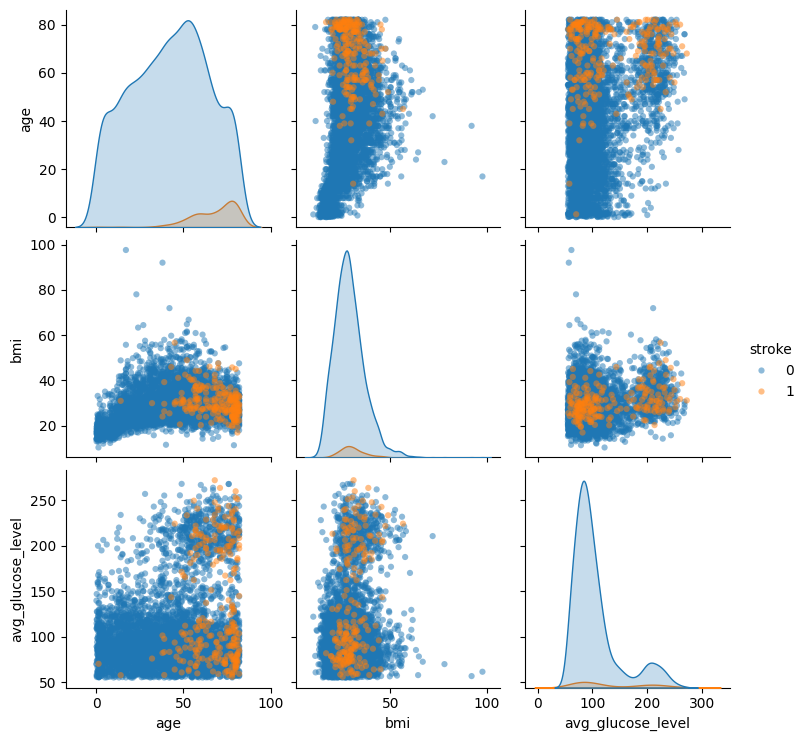

In [22]:
sns.pairplot(
    df.sort_values(
        by='stroke',
        key=lambda x: x == df['stroke'].value_counts().idxmin()
    ),
    hue='stroke',
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'none'},
    vars=['age','bmi','avg_glucose_level']
)


In [23]:
num_features = ['age','avg_glucose_level','bmi']
cat_features = ['hypertension','heart_disease']  # add more if needed

Key Differences:
- Density vs. Summary: Violin plots display a kernel density estimation (KDE), showing data concentration (width) at different values. Boxplots only show the interquartile range (IQR) and quartiles.
- Multimodal Data: Violin plots easily reveal if a distribution is multimodal (multiple peaks), whereas boxplots hide this information.
- Information Detail: Violin plots offer more detail, effectively revealing the shape of the data distribution, which is not possible with the simple box-and-whisker structure.
- Outliers: Boxplots clearly mark outliers as individual points beyond the whiskers. Violin plots focus on the overall density shape rather than identifying individual outliers

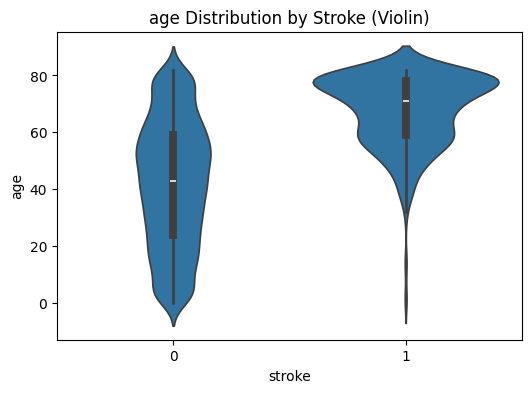

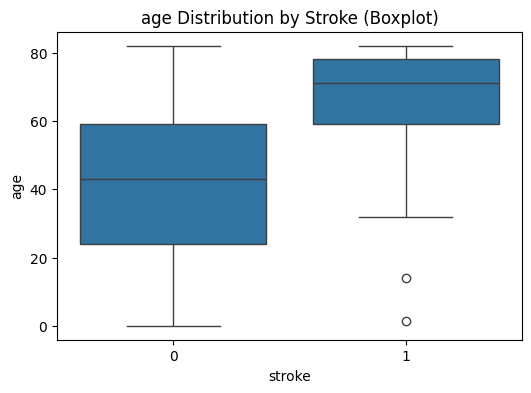

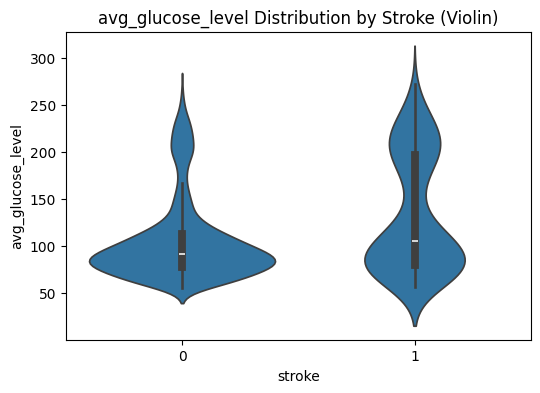

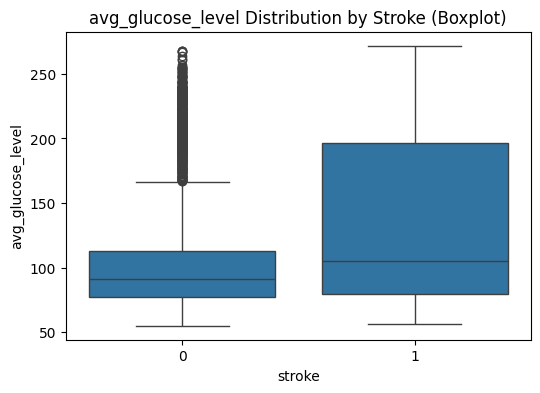

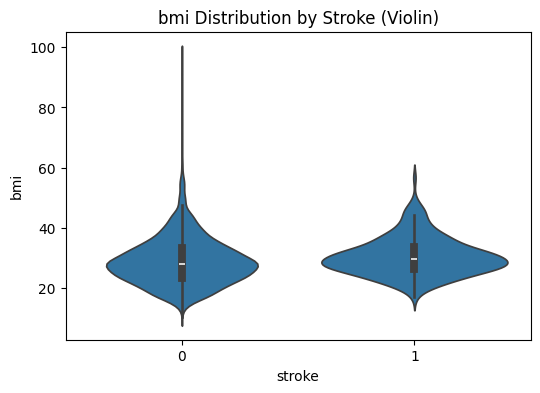

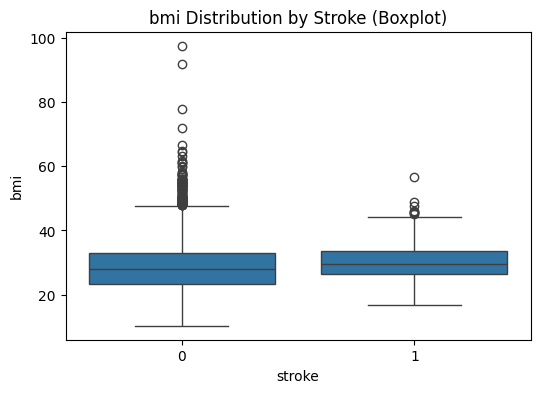

In [24]:
# Violin / Boxplots for Numeric Features by Stroke
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='stroke', y=col, data=df)
    plt.title(f'{col} Distribution by Stroke (Violin)')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'{col} Distribution by Stroke (Boxplot)')
    plt.show()

- A Histogram shows data frequencies using bars, while a KDE (Kernel Density Estimation) estimates the probability density function (PDF) using a continuous, smooth curve.
- Benefits: Reduces Noise: The smooth curve helps identify trends better than just bars.

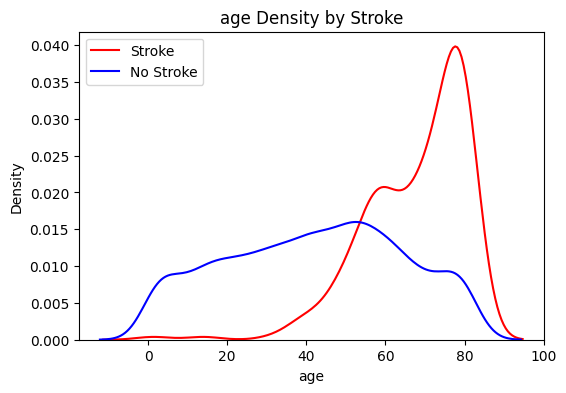

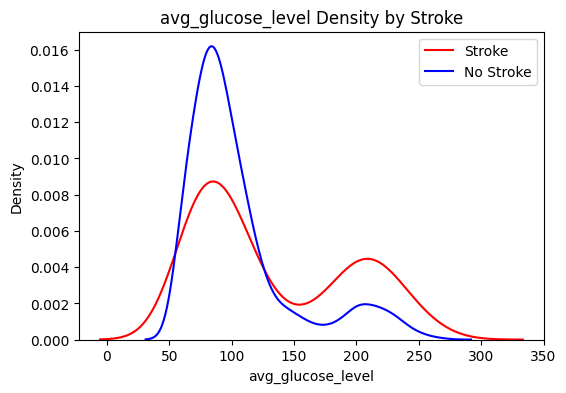

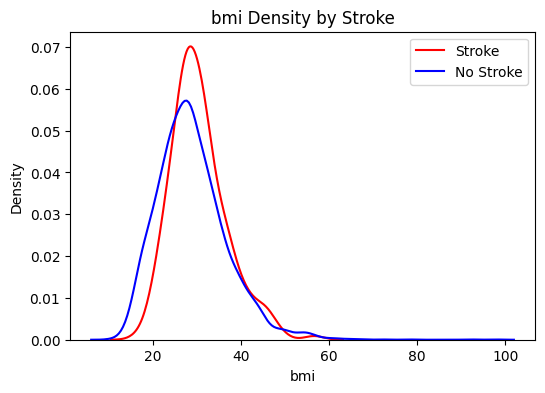

In [25]:
# KDE / Histogram Overlays
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['stroke']==1][col], color='red', label='Stroke')
    sns.kdeplot(df[df['stroke']==0][col], color='blue', label='No Stroke')
    plt.title(f'{col} Density by Stroke')
    plt.legend()
    plt.show()

In [26]:
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]

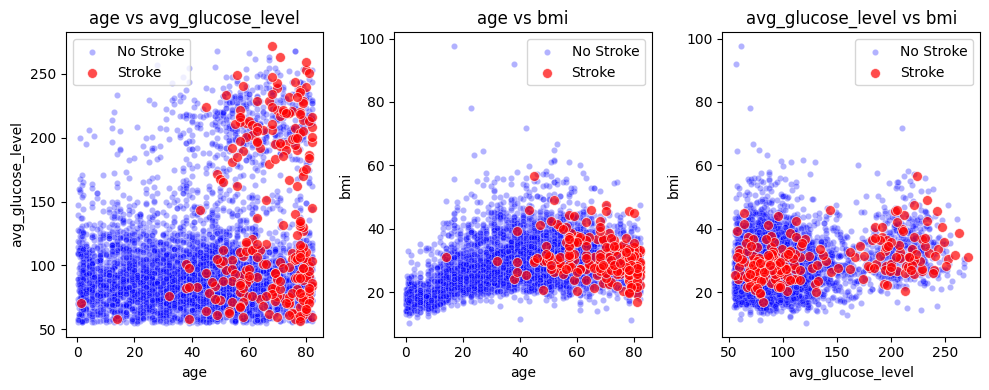

In [27]:
# Scatterplots: numeric vs numeric (minority on top)
plt.figure(figsize=(10,4))
plot_idx = 1
for i in range(len(num_features)):
    for j in range(i+1, len(num_features)):
        plt.subplot(1, 3, plot_idx)
        # Plot majority first
        sns.scatterplot(x=num_features[i], y=num_features[j], data=df_majority, 
                        color='blue', alpha=0.3, s=20, label='No Stroke')
        # Plot minority on top
        sns.scatterplot(x=num_features[i], y=num_features[j], data=df_minority, 
                        color='red', alpha=0.7, s=50, label='Stroke')
        plt.title(f'{num_features[i]} vs {num_features[j]}')
        plot_idx += 1
plt.tight_layout()
plt.show()